# Telco Customer Churn — Exploratory Data Analysis

This notebook explores the Telco Customer Churn dataset.
The goal is to understand customer behavior, identify churn patterns,
and extract meaningful business insights.


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [22]:
#Loading the dataset
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Basic Structure of the Data
In the cells below we check the size, columns, and data types, data shape, null values, basic statistics.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.shape

(7043, 21)

In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [26]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no explicit missing values. However, the column 'TotalCharges' is
an object type and may contain spaces or non-numeric values. These need cleaning. In the cell(s) below we do exactly that


In [29]:
# Cleaning: Converting 'TotalCharges' to numeric
#The column is stored as object; we convert it to float and handle invalid entries.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

In [30]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [31]:
df['TotalCharges'].isna().sum()

np.int64(0)

In [33]:
# STEP 7.2: Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [34]:
# Data overview
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


##  Basic Data Cleaning

- Checked for missing values and dropped rows with NaN in `TotalCharges` (11 rows dropped).
- Converted `TotalCharges` to numeric.
- Verified data types and summary statistics.

In [36]:
# Ensure plots are displayed inline
%matplotlib inline

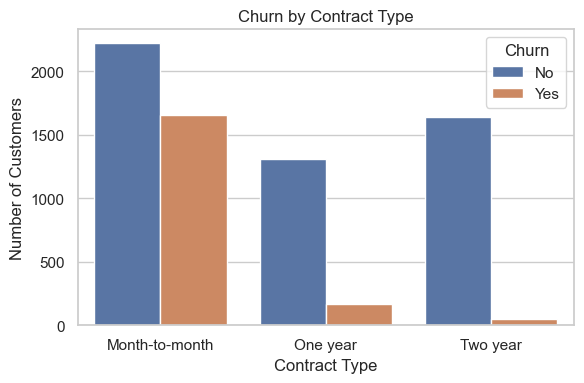

In [37]:
# STEP 3: Churn vs Contract Type
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()

# Save figure
plt.savefig('figs/churn_vs_contract.png')
plt.show()


### Churn by Contract type Business insights
Customer churn varies dramatically by contract type. Month-to-month plans have by far the most turnover, with nearly 2,000 customers staying but a close 1,700 churning out—clearly the riskiest group. One-year contracts fare much better, showing around 1,300 retained customers and only about 200 lost to churn. Two-year contracts are the standout for retention, with roughly 1,600 customers staying loyal and virtually no visible churn. Overall, locking customers into longer commitments seems to be a strong way to keep them from leaving.

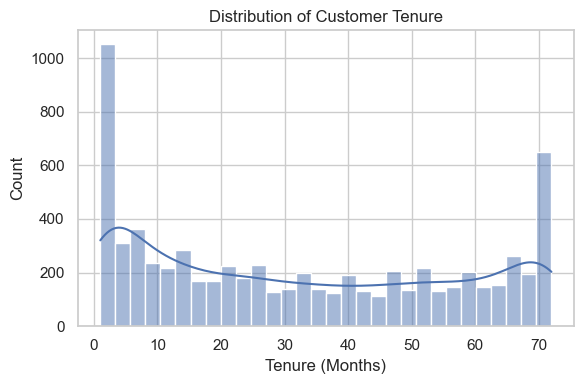

In [38]:
# STEP 4: Tenure distribution
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.tight_layout()

# Save figure
plt.savefig('figs/tenure_distribution.png')
plt.show()


### Distribution of customer tenure buisness insights
The distribution of customer tenure shows a clear bimodal pattern: there's a huge spike right at the start, with over 1,000 customers having less than a month or so of tenure, meaning a lot of people sign up and leave almost immediately. After that initial peak, the count drops sharply and stays pretty low through the middle years—hovering around 100-300 customers per month bucket—as the blue trend line smoothly declines. Then, around the 70-month mark (roughly 5-6 years), there's another noticeable rise to about 700 customers, suggesting a solid group of long-term loyal users who stick around for the long haul.

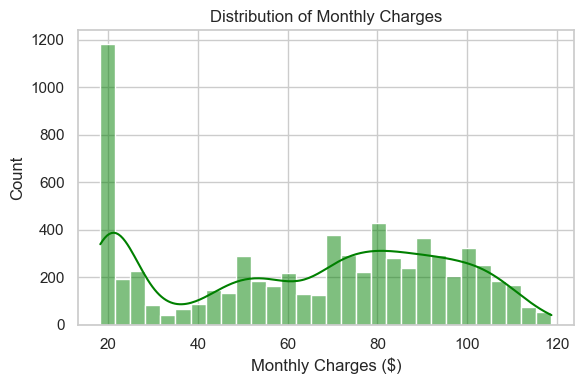

In [39]:
# STEP 5: Monthly Charges distribution
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='green')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.tight_layout()

# Save figure
plt.savefig('figs/monthly_charges_distribution.png')
plt.show()


### Distribution of monthly charges ($) business insights
The distribution of monthly charges reveals a strong concentration at the lower end, with a massive spike right around 20, over 1,200 customers are paying that amount, likely the base plan or a popular entry-level option. After that peak, the counts drop quickly through the 30-50 range, hitting a low point before picking up again into a broader cluster between roughly 70 and 100, where several bins hover around 300-400 customers each. There's a green trend line showing a gentle rise through the mid-range prices and then a steady decline toward the higher end, with very few customers paying over 110. Overall, it looks like the customer base is split between a huge group on cheap plans and a more spread-out segment opting for pricier tiers with extra features.

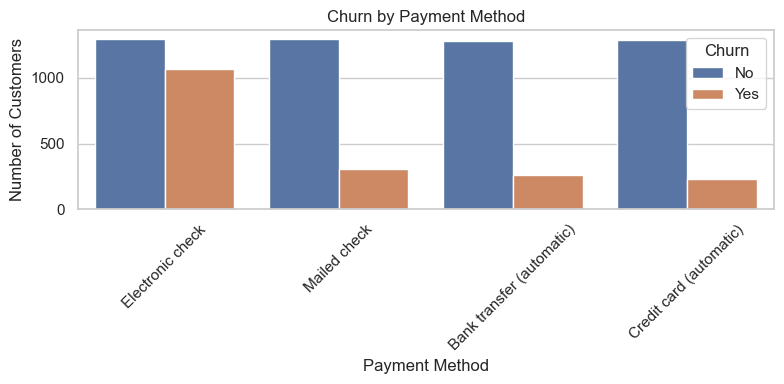

In [40]:
# STEP 6: Churn by Payment Method
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()

# Save figure
plt.savefig('figs/churn_by_payment_method.png')
plt.show()


### Churn by payment method business insights
Churn patterns differ noticeably across payment methods. Electronic check stands out as the clear problem area, with a large base of around 1,300 customers who stayed but a worrying ~1,000 who churned—making it by far the highest-churn option. In contrast, mailed check shows much better retention, with roughly 1,200 customers staying and only about 300 leaving. The automatic methods perform even stronger: bank transfer (automatic) has close to 1,100 retained and just 250 or so churned, while credit card (automatic) is the best of the bunch, with over 1,100 loyal customers and barely 200 lost. The pattern is pretty clear—automatic payments, whether bank transfer or credit card, keep customers around much longer than manual methods, especially compared to electronic checks.

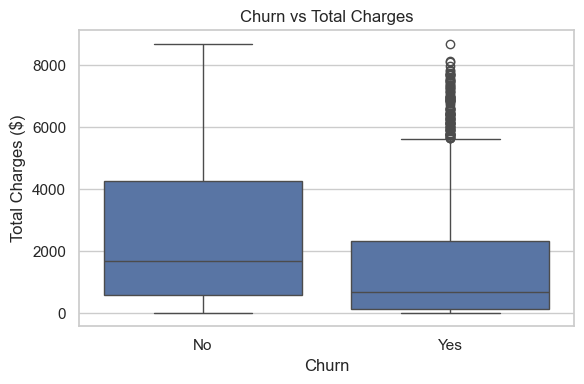

In [43]:
# STEP 7: Churn vs Total Charges
# Convert TotalCharges to numeric (it may have spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Churn vs Total Charges')
plt.xlabel('Churn')
plt.ylabel('Total Charges ($)')
plt.tight_layout()

# Save figure
plt.savefig('figs/churn_vs_total_charges.png')
plt.show()


### Churn vs Total Charges($) Business Insights

Customers who stay with the service tend to have significantly higher total charges than those who churn. The "No" churn group (customers who didn't leave) shows a median total charge around 2,500, with the bulk of them falling between roughly 1,000 and 4,500, and a few high-spending outliers stretching well above 8,000. In contrast, the "Yes" churn group has a much lower median closer to 1,000, with most customers clustered between about 200 and 2,500, and only a tight group of outliers reaching up to around 6,000-7,000. This suggests that longer-tenured, higher-spending customers are far more likely to stick around, while those with lower lifetime spend churn out much earlier.

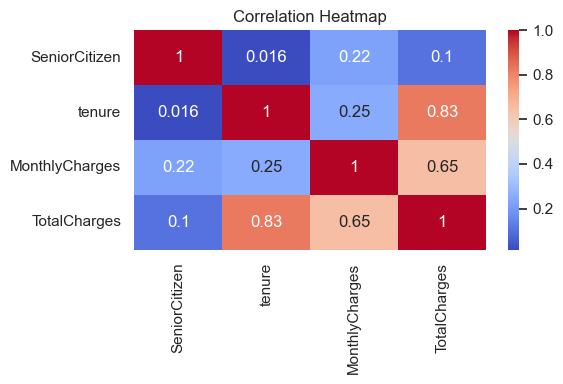

In [41]:
# STEP 8: Correlation Heatmap
# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(6,4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()

# Save figure
plt.savefig('figs/correlation_heatmap.png')
plt.show()


### Correlation Heatmap
The correlation heatmap highlights some clear relationships between key customer features. Tenure and TotalCharges show the strongest positive correlation at 0.83—makes sense, since the longer someone stays, the more they pay overall. MonthlyCharges also has a solid positive link with TotalCharges (0.65), meaning higher monthly bills naturally add up over time. Tenure correlates moderately with MonthlyCharges (0.25), suggesting that customers on pricier plans tend to stick around a bit longer. SeniorCitizen status has almost no meaningful correlation with anything here—the highest is just 0.22 with MonthlyCharges and even less (0.1) with TotalCharges—indicating age doesn't strongly influence billing or loyalty in this dataset. Overall, the big drivers seem tied to how charges accumulate with time rather than demographic factors like being a senior.

In [45]:
#confirming dataframe is clean 
df.shape, df.isna().sum()


((7032, 21),
 customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64)

### CHURN RATES ACROSS SEGMENTS

In [46]:
# churn rate by Contract
contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).rename('pct').reset_index()
contract_churn = contract[contract['Churn']=='Yes'].sort_values('pct', ascending=False)
contract_churn

,Contract,Churn,pct
1,Month-to-month,Yes,42.709677
3,One year,Yes,11.277174
5,Two year,Yes,2.848665


In [47]:
#churn rate by InternetService
internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).mul(100).rename('pct').reset_index()
internet_churn = internet[internet['Churn']=='Yes'].sort_values('pct', ascending=False)
internet_churn

,InternetService,Churn,pct
3,Fiber optic,Yes,41.892765
1,DSL,Yes,18.998344
5,No,Yes,7.434211


In [49]:
#tenure bands + churn rate
import warnings
warnings.filterwarnings('ignore')
bins = [0, 6, 12, 24, 48, 72, 100]
labels = ['0-6','7-12','13-24','25-48','49-72','73+']
df['tenure_band'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)
tenure_churn = df.groupby('tenure_band')['Churn'].value_counts(normalize=True).mul(100).rename('pct').reset_index()
tenure_churn = tenure_churn[tenure_churn['Churn']=='Yes'].sort_index()
tenure_churn


,tenure_band,Churn,pct
0,0-6,Yes,53.333333
3,7-12,Yes,35.886525
5,13-24,Yes,28.710938
7,25-48,Yes,20.388959
9,49-72,Yes,9.513176
11,73+,Yes,0.000000


In [50]:
#churn by PaymentMethod
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).mul(100).rename('pct').reset_index()
payment_churn = payment_churn[payment_churn['Churn']=='Yes'].sort_values('pct', ascending=False)
payment_churn


,PaymentMethod,Churn,pct
5,Electronic check,Yes,45.285412
7,Mailed check,Yes,19.201995
1,Bank transfer (automatic),Yes,16.731518
3,Credit card (automatic),Yes,15.253123


In [51]:
#average charges per month (total charges divided by tenure, handle zero tenure)
# avg charge per month (guard against tenure=0)
df['AvgChargePerMonth'] = df.apply(
    lambda r: r['TotalCharges']/r['tenure'] if r['tenure']>0 else r['MonthlyCharges'],
    axis=1
)
df[['tenure','TotalCharges','MonthlyCharges','AvgChargePerMonth']].head()


,tenure,TotalCharges,MonthlyCharges,AvgChargePerMonth
0,1,29.85,29.85,29.850000
1,34,1889.50,56.95,55.573529
2,2,108.15,53.85,54.075000
3,45,1840.75,42.30,40.905556
4,2,151.65,70.70,75.825000


In [52]:
#simple engagement score
# simple engagement: count of positive service subscriptions
service_cols = ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
# treat 'No phone service' or 'No' as 0, 'Yes' as 1
def svc_flag(x):
    if pd.isna(x): return 0
    return 1 if x.strip().lower()=='yes' else 0

for c in service_cols:
    df[c + '_flag'] = df[c].apply(svc_flag)

df['engagement_score'] = df[[c + '_flag' for c in service_cols]].sum(axis=1)
df[['customerID','engagement_score']].head()

,customerID,engagement_score
0,7590-VHVEG,1
1,5575-GNVDE,3
2,3668-QPYBK,3
3,7795-CFOCW,3
4,9237-HQITU,1


In [53]:
#checking churn vs engagement
engagement_churn = df.groupby('engagement_score')['Churn'].value_counts(normalize=True).mul(100).rename('pct').reset_index()
engagement_churn = engagement_churn[engagement_churn['Churn']=='Yes'].sort_values('engagement_score')
engagement_churn

,engagement_score,Churn,pct
1,0,Yes,43.750000
3,1,Yes,21.154979
5,2,Yes,32.883642
7,3,Yes,36.476684
9,4,Yes,31.378936
11,5,Yes,25.607064
13,6,Yes,22.551929
15,7,Yes,12.405063
17,8,Yes,5.288462


### Actionable Insight 1 — Contract Type & Churn

Customers on Month-to-month contracts churn at 42.71%, which is almost 4× higher than One-year customers (11.28%) and 15× higher than Two-year customers (2.85%).

Interpretation: Month-to-month users lack commitment and are the most sensitive to service issues or pricing.

Recommendation: Implement a targeted retention program—such as a 6-month discounted plan, loyalty credits, or a simplified upgrade path—to convert month-to-month subscribers into longer-term contracts.

### Actionable Insight 2 — Internet Service & Churn

Customers with Fiber optic internet churn at 41.89%, significantly higher than DSL users (18.99%) and customers with no internet service (7.43%).

Interpretation: Fiber optic subscribers are likely experiencing service dissatisfaction, pricing dissatisfaction, or higher competition.

Recommendation: Investigate Fiber-specific complaints and offer personalized retention incentives (speed upgrade trials, bill adjustments, priority support).

### Actionable Insight 3 — Payment Method & Churn

Customers paying via Electronic check have the highest churn at 45.29%, more than double that of Mailed check (19.20%) and significantly higher than automatic payments (Bank transfer: 16.73%, Credit card: 15.25%).

Interpretation: Electronic check users may be more likely to face billing issues, failed transactions, or financial instability—leading to discontinuation.

Recommendation: Encourage switching to auto-pay methods (bank or card) using small incentives or seamless opt-in flows. Provide better reminders and friction-free billing support for electronic-check users.